In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../../../../../datasets/paris_listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})
df['위도']=raw['latitude']
df['경도']=raw['longitude']
print(len(df[df['리뷰수']==0]))
# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")

# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

df_guest_prefer= df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]
df_non_guest_prefer = df[(df['슈퍼호스트'] == 'f') & (df['리뷰수'] >= 5)].sort_values('리뷰점수', ascending=True).head(4716)

25576
처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


# 각 요소
- 처음 6000개
- 줄여야함
- 돌리는데만 2시간걸림 이렇게 할바엔 랜덤 개수만큼만

In [ ]:
# 모든 편의시설을 파싱하여 유니크한 편의시설 세트 생성
amenities_set = set()
amenities_set1 = set()
df_guest_prefer['편의시설'].apply(lambda x: amenities_set.update(eval(x)))
df_non_guest_prefer['편의시설'].apply(lambda x: amenities_set1.update(eval(x)))

# 각 편의시설에 대해 이진 특성 열을 데이터프레임에 추가
for amenity in amenities_set:
    df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))

for amenity in amenities_set1:
    df_non_guest_prefer[amenity] = df_non_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
    
# '편의시설' 열 삭제
df_guest_prefer.drop('편의시설', axis=1, inplace=True)
df_non_guest_prefer.drop('편의시설', axis=1, inplace=True)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer[amenity] = df_guest_prefer['편의시설'].apply(lambda x: amenity in eval(x))
C:\Users\ciw96\AppData\Local\Temp\ipykernel_24700\922118125.py:9: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
df_guest_prefer.to_csv('../../../../../datasets/paris_prefer.csv',index=False)
df_non_guest_prefer.to_csv('../../../../../datasets/paris_non_prefer.csv',index=False)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

df_guest_prefer = pd.read_csv('../../../../../datasets/paris_prefer.csv')
df_non_guest_prefer= pd.read_csv('../../../../../datasets/paris_non_prefer.csv')

In [9]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_guest_prefer['tv'] = df_guest_prefer[tv_columns].any(axis=1)
df_guest_prefer['wifi'] = df_guest_prefer[wifi_columns].any(axis=1)
df_guest_prefer['shampoo'] = df_guest_prefer[shampoo_columns].any(axis=1)
df_guest_prefer['oven'] = df_guest_prefer[oven_columns].any(axis=1)
df_guest_prefer['stove'] = df_guest_prefer[stove_columns].any(axis=1)
df_guest_prefer['housekeeping'] = df_guest_prefer[housekeeping_columns].any(axis=1)
df_guest_prefer['sound'] = df_guest_prefer[sound_columns].any(axis=1)
df_guest_prefer['refrigerator'] = df_guest_prefer[refrigerator_columns].any(axis=1)
df_guest_prefer['parking'] = df_guest_prefer[parking_columns].any(axis=1)
df_guest_prefer['weights'] = df_guest_prefer[weights_columns].any(axis=1)
df_guest_prefer['game'] = df_guest_prefer[game_columns].any(axis=1)
df_guest_prefer['coffee'] = df_guest_prefer[coffee_columns].any(axis=1)
df_guest_prefer['pool'] = df_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_guest_prefer.drop(columns=columns_to_drop, inplace=True)


tv_columns  개수 : 629
wifi_columns  개수 : 491
shampoo_columns  개수 : 614
oven_columns  개수 : 222
stove_columns  개수 : 135
housekeeping_columns  개수 : 19
sound_columns  개수 : 255
refrigerator_columns  개수 : 145
parking_columns  개수 : 32
weights_columns  개수 : 25
game_columns  개수 : 19
coffee_columns  개수 : 35
pool_columns  개수 : 36


In [10]:
# 모든 열 이름을 소문자로 변환하여 찾기
tv_columns = [col for col in df_non_guest_prefer.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_non_guest_prefer.columns if 'wifi' in col.lower()]
shampoo_columns = [
    col for col in df_non_guest_prefer.columns if 'body soap' in col.lower() or 'shampoo' in col.lower() or 'conditioner' in col.lower()
]
oven_columns = [col for col in df_non_guest_prefer.columns if 'oven' in col.lower()]
stove_columns = [col for col in df_non_guest_prefer.columns if 'stove' in col.lower()]
housekeeping_columns = [col for col in df_non_guest_prefer.columns if 'housekeeping' in col.lower()]
sound_columns = [col for col in df_non_guest_prefer.columns if 'sound' in col.lower()]
refrigerator_columns = [col for col in df_non_guest_prefer.columns if 'refrigerator' in col.lower()]
parking_columns = [col for col in df_non_guest_prefer.columns if 'parking' in col.lower()]
weights_columns = [
    col for col in df_non_guest_prefer.columns if 'weights' in col.lower() or 'exercise' in col.lower() or 'gym' in col.lower()
]
game_columns = [col for col in df_non_guest_prefer.columns if 'game' in col.lower() ]
coffee_columns = [col for col in df_non_guest_prefer.columns if 'coffee' in col.lower() ]
pool_columns = [col for col in df_non_guest_prefer.columns if 'pool' in col.lower() ]

# 개수 확인
print(f"tv_columns  개수 : {len(tv_columns)}")
print(f"wifi_columns  개수 : {len(wifi_columns)}")
print(f"shampoo_columns  개수 : {len(shampoo_columns)}")
print(f"oven_columns  개수 : {len(oven_columns)}")
print(f"stove_columns  개수 : {len(stove_columns)}")
print(f"housekeeping_columns  개수 : {len(housekeeping_columns)}")
print(f"sound_columns  개수 : {len(sound_columns)}")
print(f"refrigerator_columns  개수 : {len(refrigerator_columns)}")
print(f"parking_columns  개수 : {len(parking_columns)}")
print(f"weights_columns  개수 : {len(weights_columns)}")
print(f"game_columns  개수 : {len(game_columns)}")
print(f"coffee_columns  개수 : {len(coffee_columns)}")
print(f"pool_columns  개수 : {len(pool_columns)}")

# 하나의  열 생성
df_non_guest_prefer['tv'] = df_non_guest_prefer[tv_columns].any(axis=1)
df_non_guest_prefer['wifi'] = df_non_guest_prefer[wifi_columns].any(axis=1)
df_non_guest_prefer['shampoo'] = df_non_guest_prefer[shampoo_columns].any(axis=1)
df_non_guest_prefer['oven'] = df_non_guest_prefer[oven_columns].any(axis=1)
df_non_guest_prefer['stove'] = df_non_guest_prefer[stove_columns].any(axis=1)
df_non_guest_prefer['housekeeping'] = df_non_guest_prefer[housekeeping_columns].any(axis=1)
df_non_guest_prefer['sound'] = df_non_guest_prefer[sound_columns].any(axis=1)
df_non_guest_prefer['refrigerator'] = df_non_guest_prefer[refrigerator_columns].any(axis=1)
df_non_guest_prefer['parking'] = df_non_guest_prefer[parking_columns].any(axis=1)
df_non_guest_prefer['weights'] = df_non_guest_prefer[weights_columns].any(axis=1)
df_non_guest_prefer['game'] = df_non_guest_prefer[game_columns].any(axis=1)
df_non_guest_prefer['coffee'] = df_non_guest_prefer[coffee_columns].any(axis=1)
df_non_guest_prefer['pool'] = df_non_guest_prefer[pool_columns].any(axis=1)



# 모든 열 리스트를 하나로 합치기
all_columns_to_drop = tv_columns + wifi_columns + shampoo_columns + oven_columns + stove_columns + housekeeping_columns + sound_columns + refrigerator_columns + parking_columns + weights_columns + game_columns + coffee_columns + pool_columns

# 리스트에서 중복 제거
columns_to_drop = list(set(all_columns_to_drop))

# 일괄 삭제
df_non_guest_prefer.drop(columns=columns_to_drop, inplace=True)


print(df)

tv_columns  개수 : 237
wifi_columns  개수 : 151
shampoo_columns  개수 : 202
oven_columns  개수 : 69
stove_columns  개수 : 54
housekeeping_columns  개수 : 7
sound_columns  개수 : 61
refrigerator_columns  개수 : 68
parking_columns  개수 : 24
weights_columns  개수 : 14
game_columns  개수 : 17
coffee_columns  개수 : 25
pool_columns  개수 : 20
                     숙소_id     호스트_id 슈퍼호스트  숙소_수              숙소_지역  \
1                   165409     788732     t   1.0             Temple   
2                     5396       7903     f   3.0     Hôtel-de-Ville   
3                   166370     793032     f   3.0           Entrepôt   
6                     7397       2626     t   9.0     Hôtel-de-Ville   
8                    41106     177387     t   2.0     Hôtel-de-Ville   
...                    ...        ...   ...   ...                ...   
82649  1103696635979533455  564997552     f   1.0  Buttes-Montmartre   
82975  1104437899838519130   13118197     f   2.0  Buttes-Montmartre   
83073  1105169305670543918   13262987

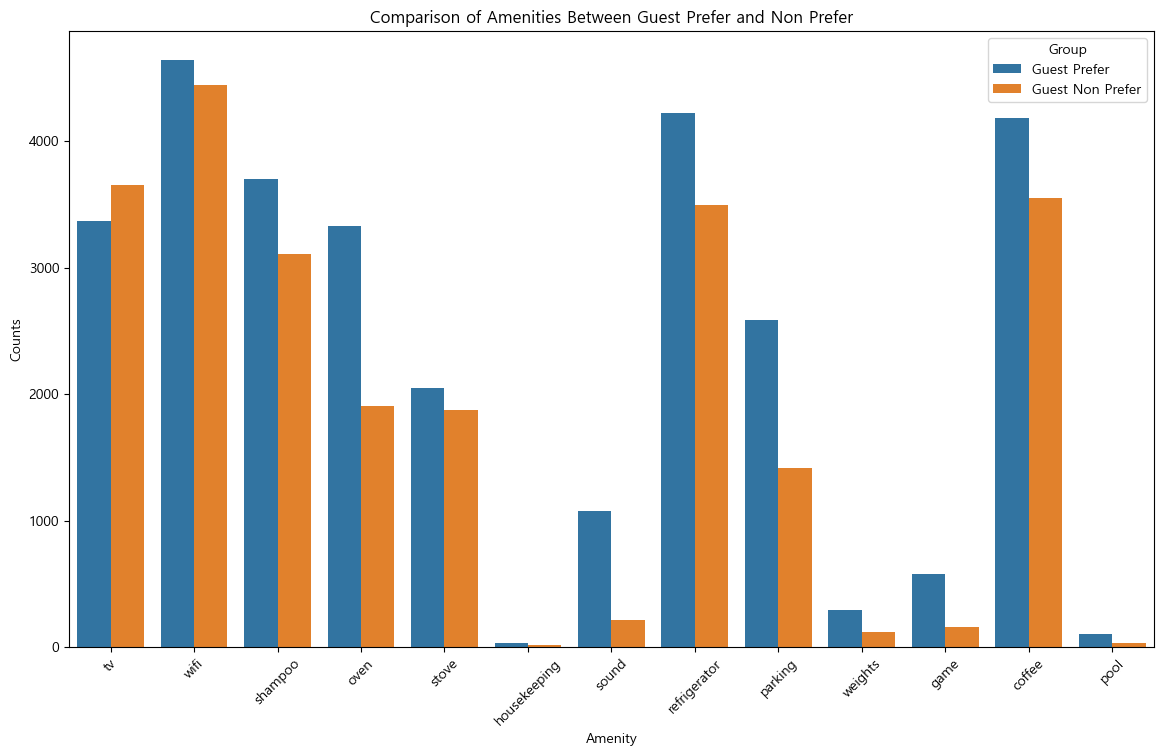

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 편의시설 요소 목록
amenities = ['tv', 'wifi', 'shampoo', 'oven', 'stove', 'housekeeping', 'sound', 'refrigerator', 'parking', 'weights', 'game', 'coffee', 'pool']

# 각 데이터프레임에 대해 편의시설의 True 개수를 계산하고 비교
results = []

for amenity in amenities:
    prefer_count = df_guest_prefer[amenity].sum()
    non_prefer_count = df_non_guest_prefer[amenity].sum()
    results.append({
        'Amenity': amenity,
        'Guest Prefer': prefer_count,
        'Guest Non Prefer': non_prefer_count
    })

# 결과 DataFrame 생성
comparison_df = pd.DataFrame(results)
comparison_df_melted = comparison_df.melt(id_vars='Amenity', value_vars=['Guest Prefer', 'Guest Non Prefer'], var_name='Type', value_name='Counts')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='Amenity', y='Counts', hue='Type', data=comparison_df_melted)

plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Comparison of Amenities Between Guest Prefer and Non Prefer')
plt.legend(title='Group')
plt.show()


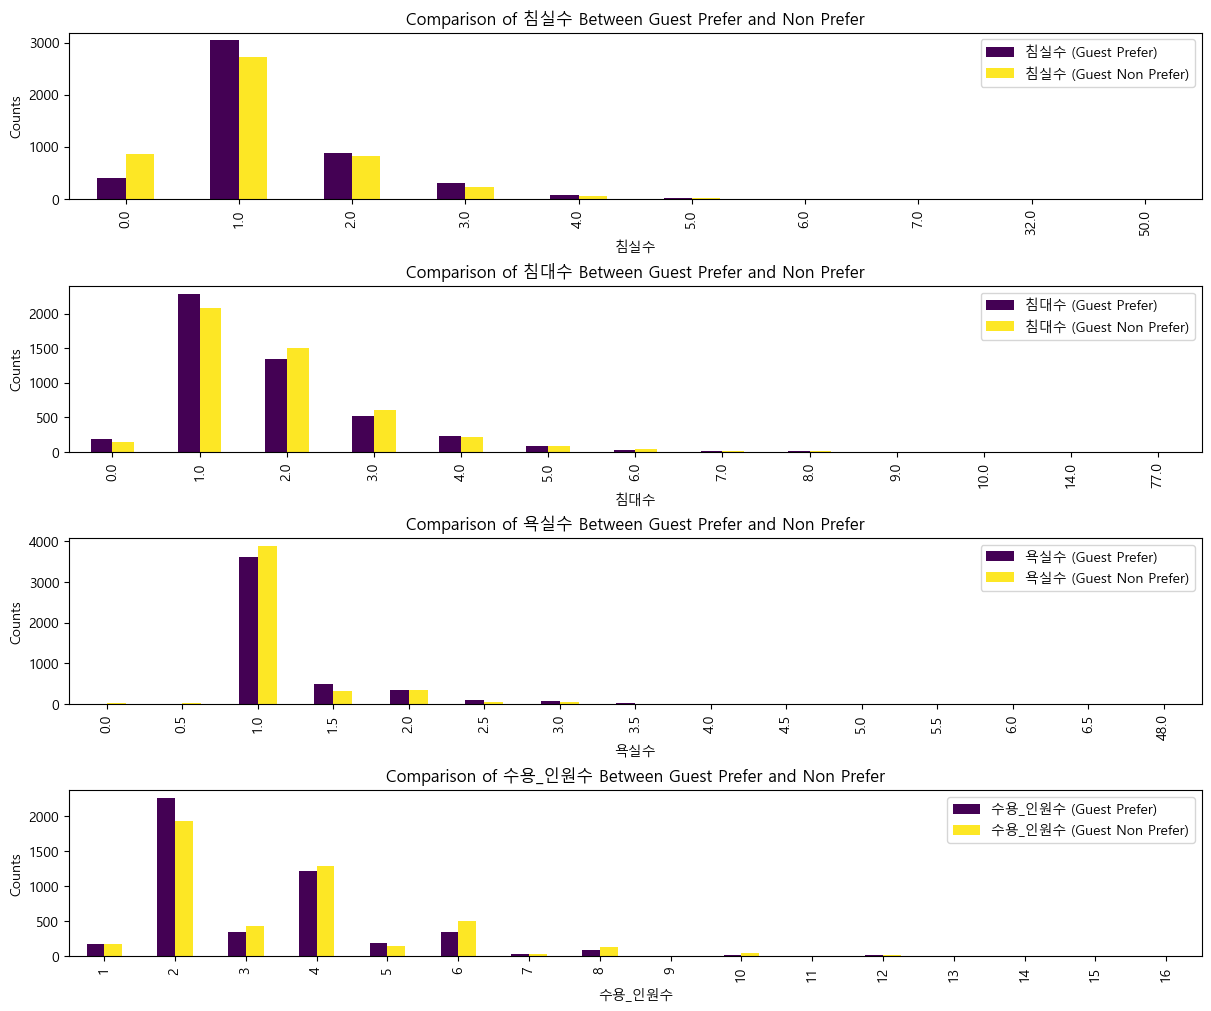

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['침실수','침대수', '욕실수', '수용_인원수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [13]:
df_guest_prefer['침실수'].unique()

array([1., 0., 2., 3., 4., 5., 7., 6.])

In [14]:
df_non_guest_prefer['침실수'].unique()

array([ 1.,  0.,  2.,  5.,  3.,  4.,  7.,  6., 32., 50.])

In [15]:
raw['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1.5 baths', '1 shared bath',
       '2 baths', '2.5 baths', '4.5 baths', nan, '2 shared baths',
       '4 baths', 'Half-bath', '1.5 shared baths', '3 baths', '3.5 baths',
       '0 baths', 'Private half-bath', 'Shared half-bath',
       '0 shared baths', '5 baths', '2.5 shared baths', '6 baths',
       '5.5 baths', '8 baths', '3 shared baths', '7 baths',
       '6 shared baths', '48 baths', '6.5 baths', '7.5 baths',
       '3.5 shared baths', '41 baths', '10 baths', '16 baths',
       '5.5 shared baths', '8.5 baths', '30 baths'], dtype=object)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 관련 열 선택
relevant_columns = ['30일_리뷰수','12개월_리뷰수', '욕실수']

# 결과 저장을 위한 리스트
results = []

# df_guest_prefer와 df_guest_non_prefer에서 각 열의 개수를 카운트
for col in relevant_columns:
    # Guest Prefer
    prefer_counts = df_guest_prefer[col].value_counts().sort_index()
    # Guest Non Prefer
    non_prefer_counts = df_non_guest_prefer[col].value_counts().sort_index()

    # 결과 데이터프레임 생성
    df_prefer = pd.DataFrame({f'{col} (Guest Prefer)': prefer_counts})
    df_non_prefer = pd.DataFrame({f'{col} (Guest Non Prefer)': non_prefer_counts})
    df_combined = pd.merge(df_prefer, df_non_prefer, left_index=True, right_index=True, how='outer').fillna(0)
    results.append(df_combined)

# 결과 시각화
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(12, 10), constrained_layout=True)

for i, df in enumerate(results):
    ax = axes[i] if len(relevant_columns) > 1 else axes
    df.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f'Comparison of {relevant_columns[i]} Between Guest Prefer and Non Prefer')
    ax.set_xlabel(relevant_columns[i])
    ax.set_ylabel('Counts')
    ax.legend()

plt.show()


In [16]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


# 이거 렉 너무걸림

In [ ]:
# import folium

# # 파리 중심부의 위도와 경도 설정
# paris_latitude = 48.8566
# paris_longitude = 2.3522

# # 파리 지도 생성
# map_paris = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# # df_guest_prefer의 위치 표시 (녹색 마커로 표시)
# for idx, row in df_guest_prefer.iterrows():
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         icon=folium.Icon(color='green', icon='info-sign'),
#         popup='Guest Prefer'
#     ).add_to(map_paris)

# # df_non_guest_prefer의 위치 표시 (빨간 마커로 표시)
# for idx, row in df_non_guest_prefer.iterrows():
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         icon=folium.Icon(color='red', icon='info-sign'),
#         popup='Non-Guest Prefer'
#     ).add_to(map_paris)

# # 지도 출력
# map_paris


In [20]:
import folium
from folium.plugins import MarkerCluster

# 파리 중심부의 위도와 경도
paris_latitude = 48.8566
paris_longitude = 2.3522

# 파리 지도 생성
map_paris = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# 랜드마크 위치 데이터
landmarks = {
    "에펠탑": (48.8584, 2.2945),
    "루브르 박물관": (48.8606, 2.3376),
    "노트르담 대성당": (48.8529, 2.3500),
    "개선문": (48.8738, 2.2950),
    "가르니에 궁전": (48.8719, 2.3316),
    "사크레쾨르 대성당": (48.8867, 2.3431),
    "생트 샤펠": (48.8554, 2.3450),
    "알렉산드르 3세 다리": (48.8639, 2.3136),
    "마레 지구": (48.8575, 2.3588),
    "몽마르트": (48.8867, 2.3431),
    "팡테옹": (48.8463, 2.3460),
    "룩셈부르크 정원": (48.8462, 2.3371),
    "오르세 미술관": (48.8600, 2.3257),
    "샹젤리제 거리": (48.8696, 2.3079),
    "레 장발리드": (48.8565, 2.3126),
    "콩코르드 광장": (48.8656, 2.3211),
    "퐁피두 센터": (48.8606, 2.3522),
    "라 데팡스": (48.8900, 2.2400),
    "갤러리 라파예트": (48.8738, 2.3320),
    "그레뱅 박물관": (48.8718, 2.3422)
}

# 각 랜드마크에 대한 마커 추가
for landmark, (lat, lng) in landmarks.items():
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(icon='star', color='blue'),
        popup=landmark
    ).add_to(map_paris)

# 클러스터 객체 생성
marker_cluster = MarkerCluster().add_to(map_paris)

# df_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='green', icon='info-sign'),
        popup='Guest Prefer'
    ).add_to(marker_cluster)

# df_non_guest_prefer의 위치 표시 (클러스터에 추가)
for idx, row in df_non_guest_prefer.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup='Non-Guest Prefer'
    ).add_to(marker_cluster)


# 지도를 HTML 파일로 저장
map_paris.save('paris_landmarks_map.html')


In [22]:
pip install geopy


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from geopy.distance import geodesic

# 특정 랜드마크와의 거리 계산 함수 정의
def count_accommodations_within_distance(df, landmark_coords, max_distance_km):
    count = 0
    for idx, row in df.iterrows():
        # 숙소 위치
        accommodation_location = (row['위도'], row['경도'])
        # 랜드마크와 숙소 간의 거리 계산
        distance = geodesic(landmark_coords, accommodation_location).km
        # 특정 거리 이내에 있으면 카운트
        if distance <= max_distance_km:
            count += 1
    return count

# 각 랜드마크와의 거리 계산
landmark_distances = {}
for landmark, coords in landmarks.items():
    count_prefer = count_accommodations_within_distance(df_guest_prefer, coords, 1)  # 1km 이내
    count_non_prefer = count_accommodations_within_distance(df_non_guest_prefer, coords, 1)  # 1km 이내
    landmark_distances[landmark] = {'Guest Prefer': count_prefer, 'Non-Guest Prefer': count_non_prefer}

# 결과 출력
for landmark, counts in landmark_distances.items():
    print(f"{landmark}:  1km 내 게스트 선호: {counts['Guest Prefer']}, 게스트 불호: {counts['Non-Guest Prefer']}")


에펠탑: Guest Prefer within 1km: 167, Non-Guest Prefer within 1km: 160
루브르 박물관: Guest Prefer within 1km: 318, Non-Guest Prefer within 1km: 339
노트르담 대성당: Guest Prefer within 1km: 382, Non-Guest Prefer within 1km: 352
개선문: Guest Prefer within 1km: 176, Non-Guest Prefer within 1km: 207
가르니에 궁전: Guest Prefer within 1km: 230, Non-Guest Prefer within 1km: 303
사크레쾨르 대성당: Guest Prefer within 1km: 529, Non-Guest Prefer within 1km: 397
생트 샤펠: Guest Prefer within 1km: 387, Non-Guest Prefer within 1km: 376
알렉산드르 3세 다리: Guest Prefer within 1km: 87, Non-Guest Prefer within 1km: 120
마레 지구: Guest Prefer within 1km: 524, Non-Guest Prefer within 1km: 490
몽마르트: Guest Prefer within 1km: 529, Non-Guest Prefer within 1km: 397
팡테옹: Guest Prefer within 1km: 228, Non-Guest Prefer within 1km: 221
룩셈부르크 정원: Guest Prefer within 1km: 224, Non-Guest Prefer within 1km: 219
오르세 미술관: Guest Prefer within 1km: 114, Non-Guest Prefer within 1km: 88
샹젤리제 거리: Guest Prefer within 1km: 97, Non-Guest Prefer within 1km: 153
레 장발리드

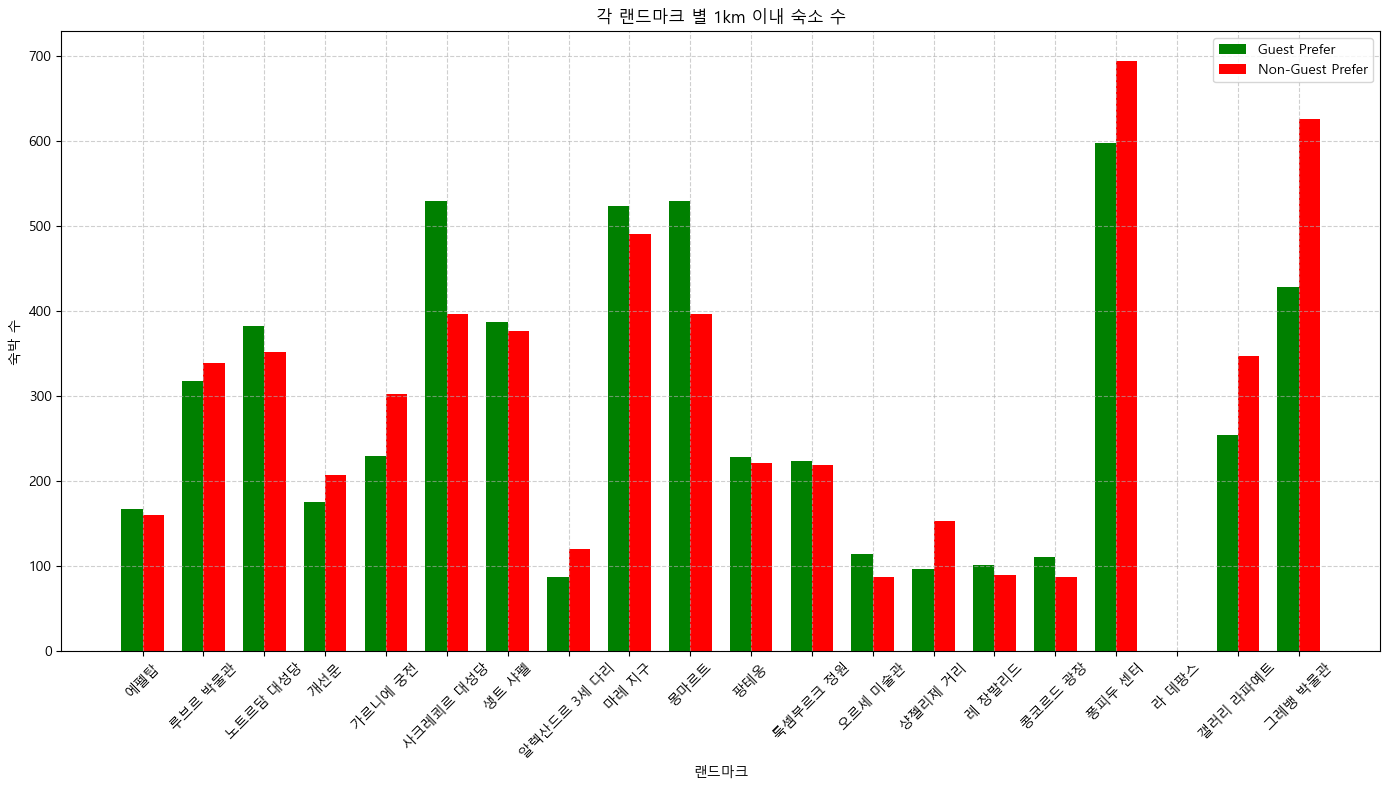

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

# 랜드마크 거리 데이터 프레임 생성
landmark_df = pd.DataFrame(landmark_distances).T  # 행과 열 전환

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))

# 막대 너비 설정
bar_width = 0.35
index = np.arange(len(landmark_df))  # 위치 인덱스 생성, numpy를 사용

# 각 그룹 별 막대 그래프 생성
bars1 = plt.bar(index, landmark_df['Guest Prefer'], bar_width, label='Guest Prefer', color='green')
bars2 = plt.bar(index + bar_width, landmark_df['Non-Guest Prefer'], bar_width, label='Non-Guest Prefer', color='red')

# 그래프 제목, 레이블 설정
plt.xlabel('랜드마크')
plt.ylabel('숙박 수')
plt.title('각 랜드마크 별 1km 이내 숙소 수')
plt.xticks(index + bar_width / 2, landmark_df.index, rotation=45)
plt.legend()

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()
plt.show()
